In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


X_all, y_all = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=2, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
X_eval = X_all[100:, :]
y_eval = y_all[100:]

X = X_all[:100, :]
y = y_all[:100]

In [2]:
class EMAlgo:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.n_clusters = 2
        index = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.mu = np.array([X[index[0]], X[index[1]]])
        self.sigma = np.array([[[0.2, 0.0], [0.0, 0.2]], [[0.2, 0.0], [0.0, 0.2]]])
        self.pi = np.array([0.5, 0.5])
        self.gamma = np.zeros((self.n_clusters, X.shape[0]))
                              

    def step(self):
        self.e_step()
        self.m_step()
        
    def e_step(self):
        for i in range(self.X.shape[0]):
            normalizer = 0.0001
            for j in range(self.n_clusters):
                rv = multivariate_normal(self.mu[j], self.sigma[j])
                self.gamma[j, i] = self.pi[j]*rv.pdf(self.X[i])
                normalizer += self.gamma[j, i]
            for j in range(self.n_clusters):
                self.gamma[j, i] /= normalizer

    def m_step(self):
        n_c = np.zeros(self.n_clusters)
        for j in range(self.n_clusters):
            for i in range(self.X.shape[0]):
                n_c[j] += self.gamma[j, i]

        for j in range(self.n_clusters):
            self.pi[j] = n_c[j] / self.X.shape[0]
                
        for j in range(self.n_clusters):
            s = 0.0
            for i in range(self.X.shape[0]):
                s += self.gamma[j, i] * self.X[i]
            self.mu[j] = (1/n_c[j]) * s

        for j in range(self.n_clusters):
            s = 0
            for i in range(self.X.shape[0]):
                s += self.gamma[j, i] * (self.X[i] - self.mu[j]).reshape((self.X.shape[1], 1)) @ (self.X[i] - self.mu[j]).reshape((1, self.X.shape[1]))
            self.sigma[j] = (1/n_c[j]) * s

    def eval(self, X_eval, y_eval):
        gamma = np.zeros((self.n_clusters, X_eval.shape[0]))
        
        for i in range(X_eval.shape[0]):
            normalizer = 0.0001
            for j in range(self.n_clusters):
                rv = multivariate_normal(self.mu[j], self.sigma[j])
                gamma[j, i] = self.pi[j]*rv.pdf(X_eval[i])
                normalizer += gamma[j, i]
            for j in range(self.n_clusters):
                gamma[j, i] /= normalizer

        print("gamma shape: ", gamma.shape)
        self.eval_pred = np.argmax(gamma, axis=0)
        print("Eval acc: ", (self.eval_pred == y_eval).sum() / y_eval.shape)

    def plot(self, X_eval = None):
        plt.scatter(self.X[self.y == 0, 0], self.X[self.y == 0, 1], 
                c='blue', marker='o', edgecolor='black', s=50)
        plt.scatter(self.X[self.y == 1, 0], self.X[self.y == 1, 1], 
                c='green', marker='o', edgecolor='black', s=50)

        if X_eval is not None:
            plt.scatter(X_eval[self.eval_pred == 0, 0], X_eval[self.eval_pred == 0, 1], 
                c='blue', marker='+', edgecolor='black', s=50)
            plt.scatter(X_eval[self.eval_pred == 1, 0], X_eval[self.eval_pred == 1, 1], 
                c='green', marker='+', edgecolor='black', s=50)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        Max = np.max(self.X)
        Min = np.min(self.X)

        x_plt = np.linspace(Min, Max, 100)
        y_plt = np.linspace(Min, Max, 100)

        x_plt, y_plt = np.meshgrid(x_plt, y_plt)
        pos  = np.dstack((x_plt, y_plt))
        rv_0   = multivariate_normal(self.mu[0], self.sigma[0])
        z_0    = rv_0.pdf(pos)
        plt.contour(x_plt, y_plt, z_0, colors='blue')

        rv_1   = multivariate_normal(self.mu[1], self.sigma[1])
        z_1    = rv_1.pdf(pos)
        plt.contour(x_plt, y_plt, z_1, colors='green')

        plt.grid()
        plt.tight_layout()
        plt.show()

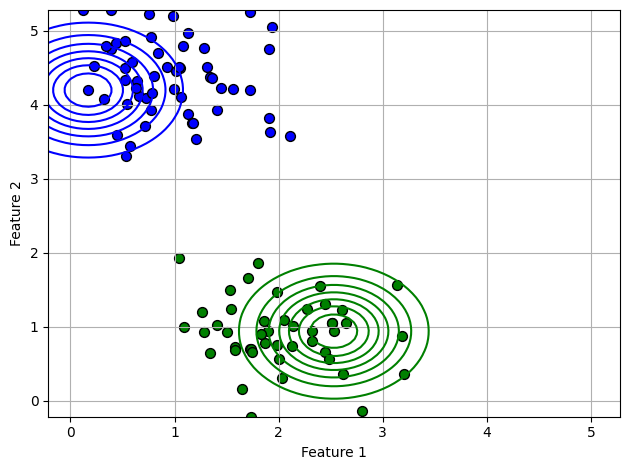

In [3]:
em = EMAlgo(X, y)
em.plot()

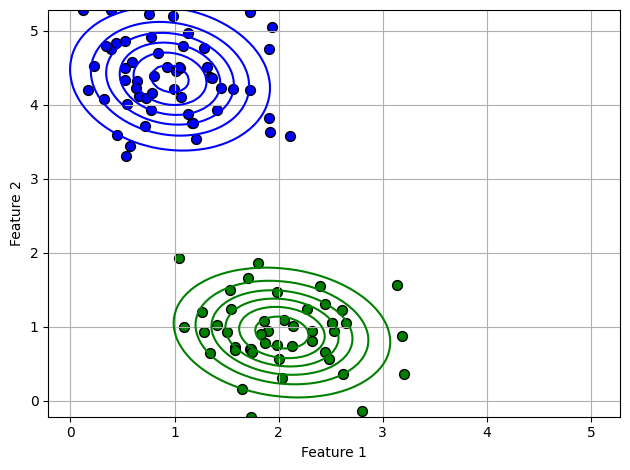

In [4]:
for i in range(10):
    em.step()
em.plot()

gamma shape:  (2, 50)
Eval acc:  [1.]


/tmp/ipykernel_1986019/1392175333.py:71: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_eval[self.eval_pred == 0, 0], X_eval[self.eval_pred == 0, 1],
/tmp/ipykernel_1986019/1392175333.py:73: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_eval[self.eval_pred == 1, 0], X_eval[self.eval_pred == 1, 1],


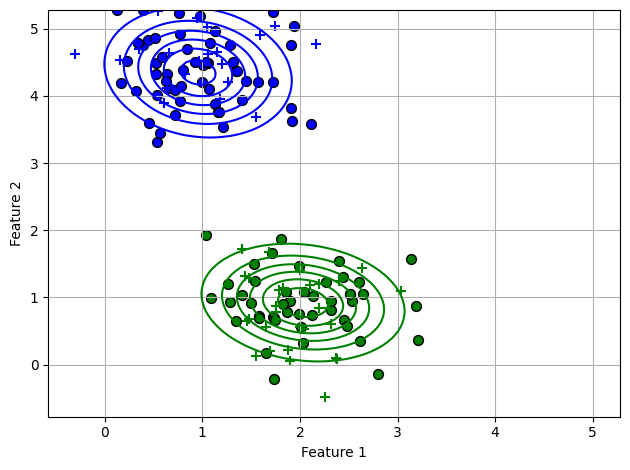

In [5]:
for i in range(10):
    em.step()
em.eval(X_eval, y_eval)
em.plot(X_eval)